# Model Evaluation
Evaluate the performance of BGRU and GAN models for the repective Hong Kong and United States' stock market

In [26]:
import os
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.metrics import Accuracy, MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [27]:
EVALUATION_DIAGRAM_PATH = "./diagrams/model/evaluation"
SCALER_PATH = "./scaler"

# stocks model checkpoint paths
HK_MODELS_CHECKPOINT_PATH = "./model/hk"
US_MODELS_CHECKPOINT_PATH = "./model/us"

# bgru
hk_bgru_file_path = "{}/bgru.h5".format(HK_MODELS_CHECKPOINT_PATH)
hk_bgru_train_history_file_path = "{}/bgru_training_history.npy".format(HK_MODELS_CHECKPOINT_PATH)

us_bgru_file_path = "{}/bgru.h5".format(US_MODELS_CHECKPOINT_PATH)
us_bgru_train_history_file_path = "{}/bgru_training_history.npy".format(US_MODELS_CHECKPOINT_PATH)

# gan
hk_gan_file_path = "{}/gan.h5".format(HK_MODELS_CHECKPOINT_PATH)
hk_gan_train_history_file_path = "{}/gan_training_history.npy".format(HK_MODELS_CHECKPOINT_PATH)

us_gan_file_path = "{}/gan.h5".format(US_MODELS_CHECKPOINT_PATH)
us_gan_train_history_file_path = "{}/gan_training_history.npy".format(US_MODELS_CHECKPOINT_PATH)

def create_dir_if_not_exist(dirname):
    if not os.path.exists(dirname):
        os.makedirs(dirname, exist_ok=True)

In [28]:
# plot diagrams function
def plot_predicted_price(predicted_y, actual_y, title, predicted_y_legend_label, actual_y_legend_label,
                                   price_currency):

    plt.figure(figsize=(14, 5), dpi=500, facecolor="white")
    plt.plot(predicted_y, label=predicted_y_legend_label)
    plt.plot(actual_y, label=actual_y_legend_label)
    plt.xlabel('Trading Day')
    plt.ylabel(price_currency)
    plt.title(title)
    plt.legend()
    create_dir_if_not_exist(EVALUATION_DIAGRAM_PATH)
    plt.savefig('{}/{}.png'.format(EVALUATION_DIAGRAM_PATH, plt.gca().get_title()))
    plt.show()

### Import datasets

In [29]:
evaluation_stocks_path = "./data/processed/stocks_for_evaluate/"

npys = [x for x in os.listdir(evaluation_stocks_path) if x.endswith('.npy')]

# get stocks name
fns = [os.path.splitext(os.path.basename(x))[0] for x in npys]

d = {}
for i in range(len(fns)):
    d[fns[i]] = np.load(evaluation_stocks_path + npys[i])

# Show the read files
d["AAPL_test_X"]

array([[[-0.46574393, -0.46232018, -0.45451123, ..., -1.        ,
          0.36145311, -0.20713819],
        [-0.4508884 , -0.45018057, -0.44306388, ..., -1.        ,
          0.36009613, -0.21320475],
        [-0.4452837 , -0.44637004, -0.44121307, ..., -1.        ,
          0.36001233, -0.22124208],
        ...,
        [-0.39089169, -0.38068071, -0.37732653, ..., -1.        ,
          0.46794978, -0.20165107],
        [-0.39241105, -0.38698664, -0.3825019 , ..., -1.        ,
          0.47209204, -0.19634037],
        [-0.38832576, -0.38789712, -0.37801202, ..., -1.        ,
          0.47472967, -0.1933846 ]],

       [[-0.4508884 , -0.45018057, -0.44306388, ..., -1.        ,
          0.36009613, -0.21320475],
        [-0.4452837 , -0.44637004, -0.44121307, ..., -1.        ,
          0.36001233, -0.22124208],
        [-0.45787728, -0.45807136, -0.45142666, ..., -1.        ,
          0.36606751, -0.19934388],
        ...,
        [-0.39241105, -0.38698664, -0.3825019 , ..., -

### Import scaler

In [30]:
joblibs = [x for x in os.listdir(SCALER_PATH) if x.endswith('.joblib')]

# get scaler names
scaler_names = [os.path.splitext(os.path.basename(x))[0] for x in joblibs]

scalers = {}

for i in range(len(scaler_names)):
    scalers[scaler_names[i]] = joblib.load(SCALER_PATH + "/" + joblibs[i])

# Show the read scaler
print(scalers["{}.X_scaler".format("1038.HK")])
print(scalers["{}.y_scaler".format("1038.HK")])

MinMaxScaler(feature_range=(-1, 1))
MinMaxScaler(feature_range=(-1, 1))


### Import models

In [31]:
hk_bgru = load_model(hk_bgru_file_path)
# hk_gan = load_model(hk_gan_file_path)
# us_bgru = load_model(us_bgru_file_path)
# us_gan = load_model(us_gan_file_path)


### Predicts the stocks
##### HK models Predicting 1038.HK

In [32]:
hk_bgru_eva_result = {}
hk_bgru_predict_result = {}

16/16 [==============================] - 1s 26ms/step - loss: 1.3752 - mean_absolute_error: 1.1242 - root_mean_squared_error: 1.1727 - mean_absolute_percentage_error: 798.5665

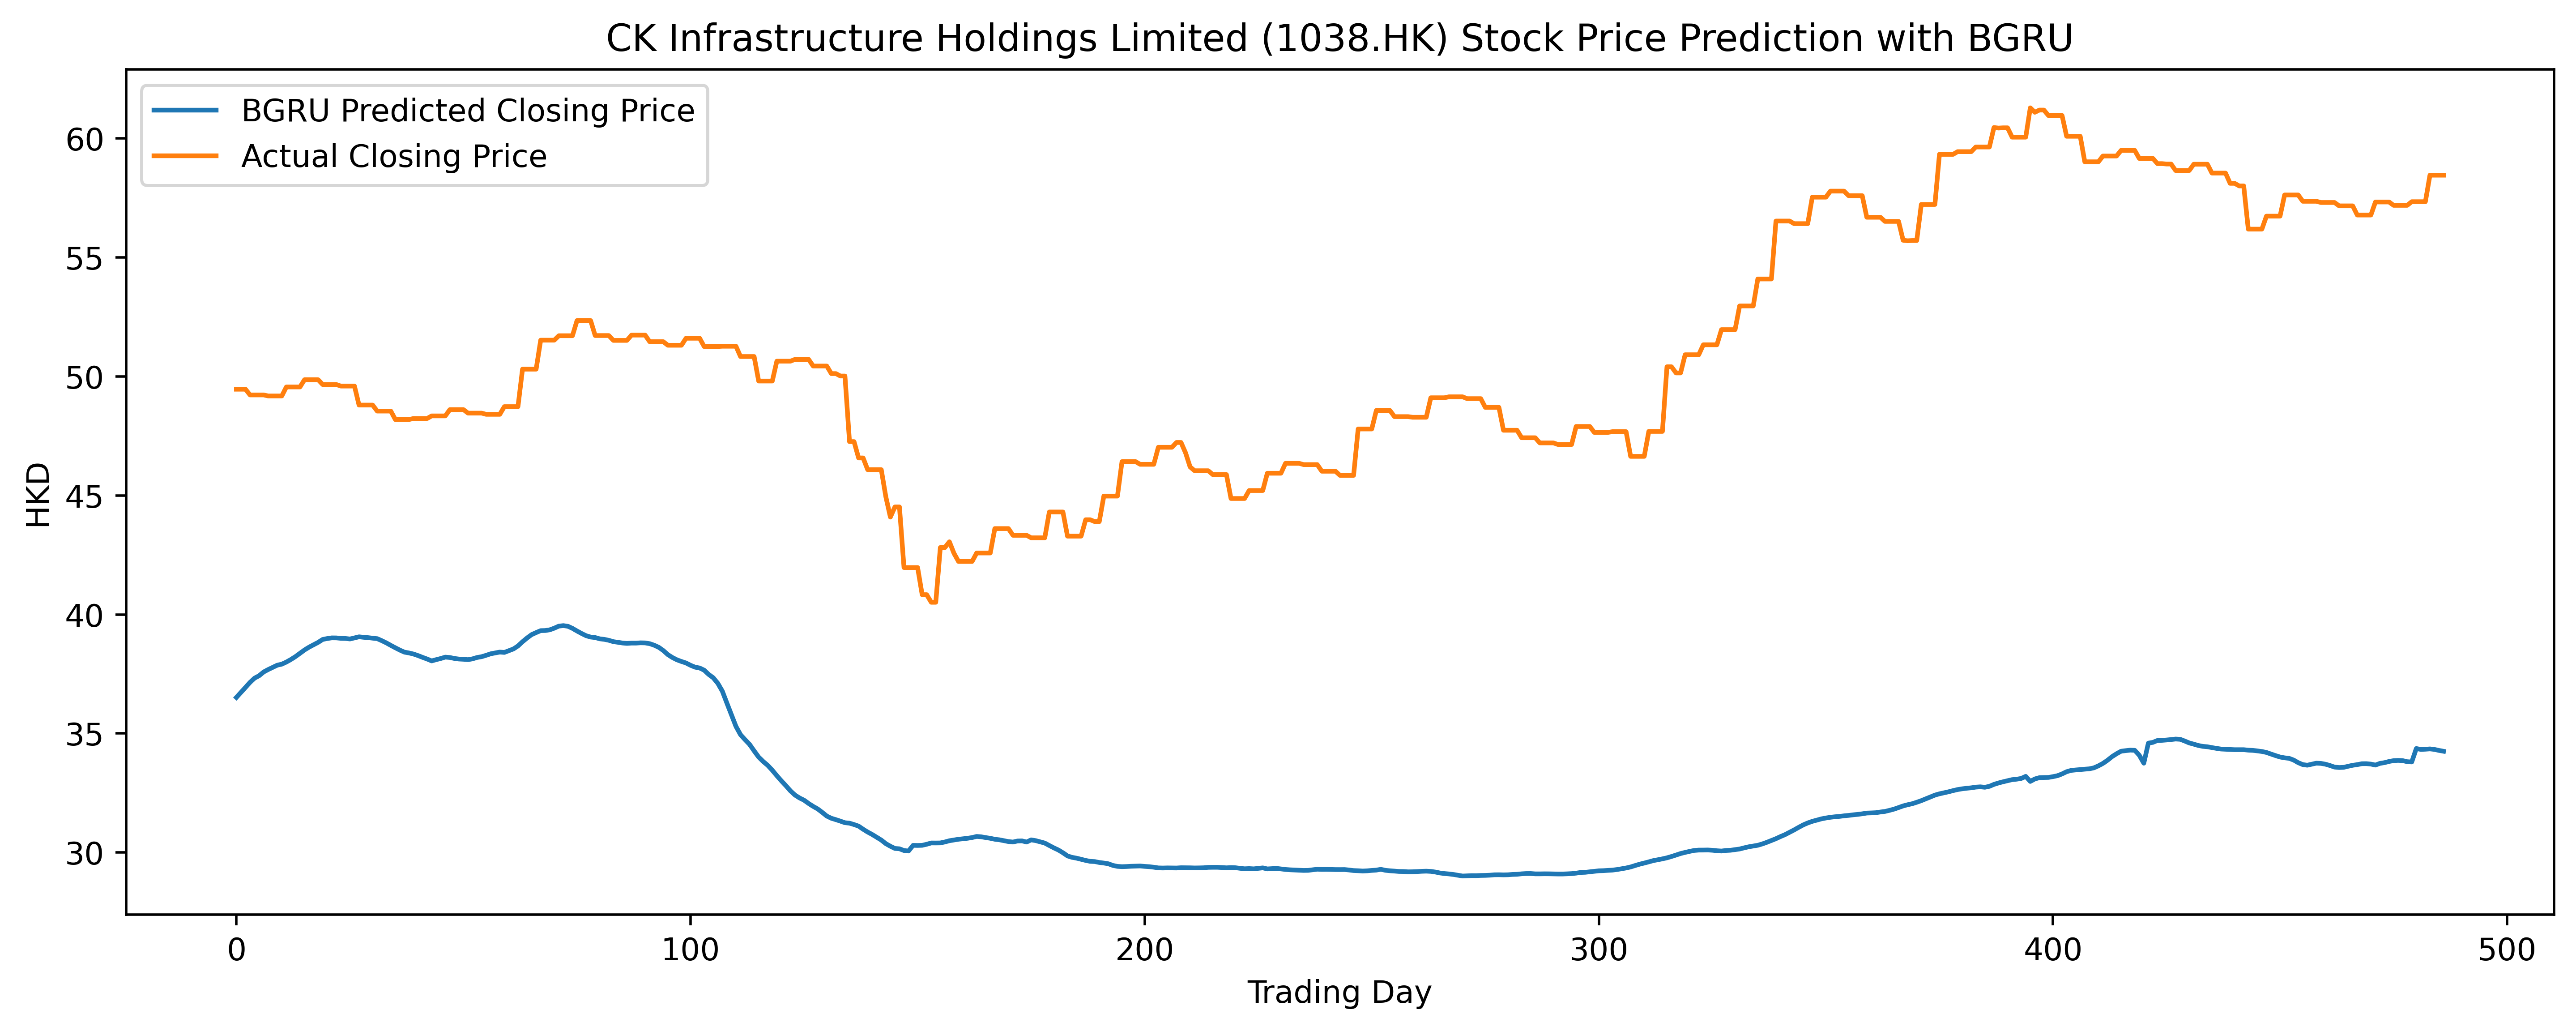

In [33]:
hk_bgru_eva_result["1038.HK"] = hk_bgru.evaluate(x=d["1038.HK_test_X"], y=d["1038.HK_test_y"])
hk_bgru_predict_result["1038.HK"] = hk_bgru.predict(x=d["1038.HK_test_X"])
scaler_1038_y = scalers["{}.y_scaler".format("1038.HK")]

plot_predicted_price(
    predicted_y=scaler_1038_y.inverse_transform(
        hk_bgru_predict_result["1038.HK"]
    ),
    actual_y=scaler_1038_y.inverse_transform(
        d["1038.HK_test_y"]
    ),
    title="CK Infrastructure Holdings Limited (1038.HK) Stock Price Prediction with BGRU",
    predicted_y_legend_label="BGRU Predicted Closing Price",
    actual_y_legend_label="Actual Closing Price",
    price_currency="HKD"
)